In [10]:
import numpy as np
import pandas as pd
df=pd.read_csv("50_Startups.csv")

In [11]:
df.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [15]:
df.isnull().sum()

RD_Spend           0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [16]:
df.shape

(50, 5)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [18]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.select_dtypes(include=["object"]):
    df[column] = le.fit_transform(df[column])
df.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [19]:
df.corr()

,RD_Spend,Administration,Marketing_Spend,State,Profit
RD_Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


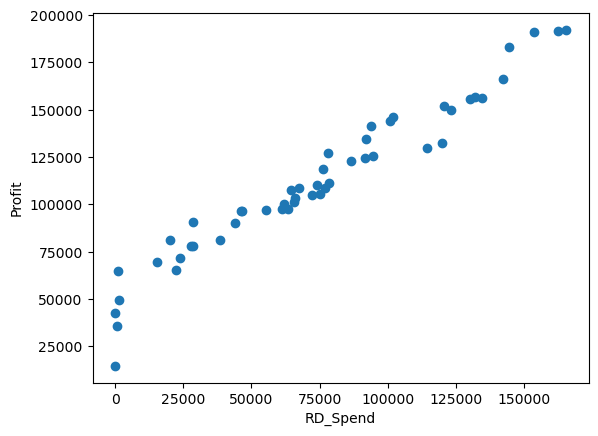

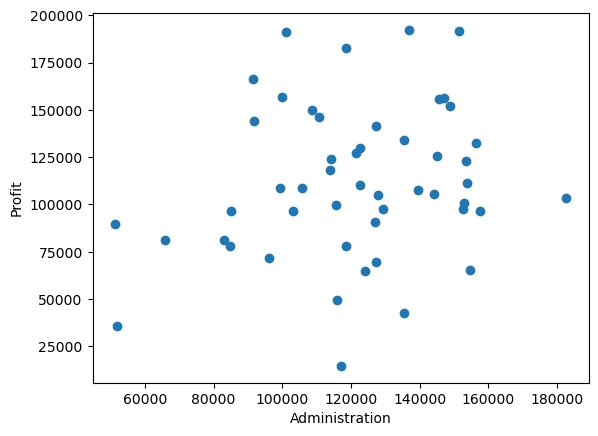

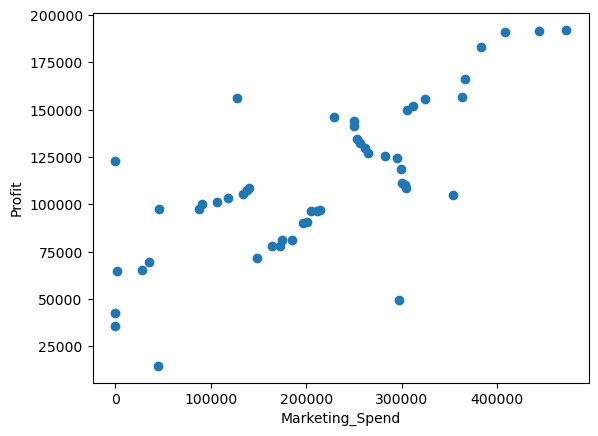

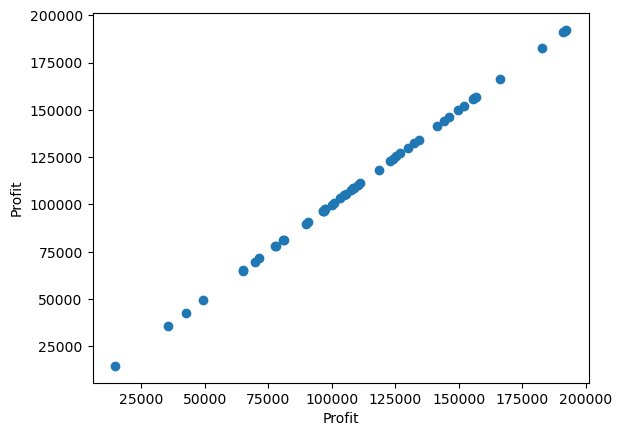

In [20]:
#Drawing Scatter plot for all variables
import matplotlib.pyplot as plt

# Create a scatter plot for each column in the dataset, with profit as the y-axis
for col in df.columns:
    if col != 'State':
        plt.scatter(df[col], df['Profit'])
        plt.xlabel(col)
        plt.ylabel('Profit')
        plt.show()


array([[<Axes: title={'center': 'Profit'}>,
        <Axes: title={'center': 'RD_Spend'}>]], dtype=object)

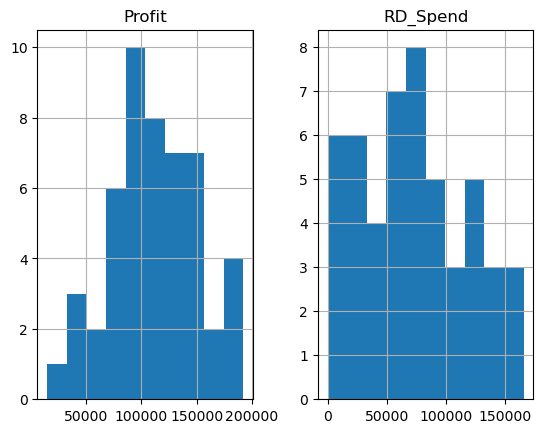

In [24]:
#plotting histogram for Profit and RD Spend
df[['Profit','RD_Spend']].hist()

In [26]:
df.describe()

,RD_Spend,Administration,Marketing_Spend,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,1.000000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.832993,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


In [7]:
#using statsmodels
import statsmodels.formula.api as smf
model = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           8.51e-29
Time:                        10:08:12   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
RD_Spend            0.8058      0.046     17.609      0.000       0.714       0.898
Administration     -0.0268      0.052     -0.520      0.606      -0.131       0.077
Marketing_Spend     0.0272      0.017      1.637      0.109      -0.006       0.061
State             -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
#make sure that p values should below 0.05
#here Administration and State having p value above (0.05), that means they have higher correlation.
#so i should eleiminate either Administration or State

In [9]:
#Removing State
import statsmodels.formula.api as smf
model = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           4.53e-30
Time:                        10:08:23   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_Spend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
#removing Administration
import statsmodels.formula.api as smf
model = smf.ols('Profit~RD_Spend+Marketing_Spend',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           2.16e-31
Time:                        10:11:19   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RD_Spend            0.7966      0.041     19.266      0.000       0.713       0.880
Marketing_Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
#Error calculation., for errors really following ND
model.resid

0      -538.628625
1      2017.400520
2      9645.011903
3      9460.681158
4     -4939.683218
5     -5888.190812
6     -1905.620454
7     -4703.138877
8      -106.033673
9     -4583.853935
10    11110.035276
11     9620.529925
12    12367.123421
13     6495.144535
14   -17589.841797
15   -16115.675433
16     9967.038152
17    -5459.074732
18    -4615.298828
19     6960.441667
20     1823.137908
21    -7071.150709
22    -4638.134639
23    -1152.195217
24    -4000.147151
25     4791.430758
26    -5257.252884
27    -9970.295150
28      157.367240
29    -1435.784090
30      852.370438
31     -830.988854
32    -1436.822254
33     -821.810445
34     6450.158781
35     6703.015715
36    14883.956088
37     1975.125482
38    12597.741677
39    -1919.055275
40     3190.853969
41     3684.941295
42     1264.239426
43     9368.747148
44     -289.399308
45    17096.506020
46    -7419.050859
47    -4416.134221
48   -11734.242602
49   -33645.494462
dtype: float64

In [11]:
#MSE in Sats model
mse=np.mean(model.resid ** 2)
print("mean squared error: ",mse)
rmse = np.sqrt(mse)
print("RMSE error: ",rmse)

mean squared error:  78887897.0064876
RMSE error:  8881.88589244917


<Axes: >

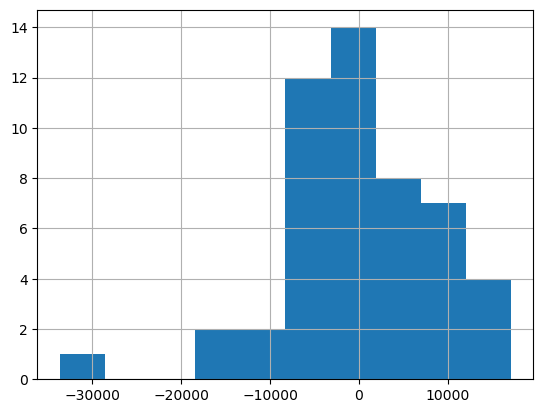

In [12]:
model.resid.hist()

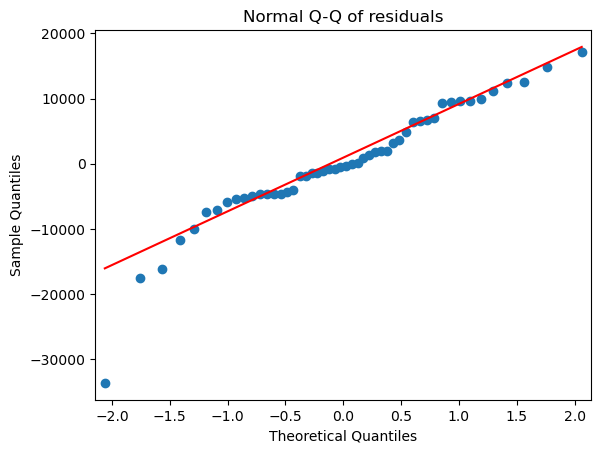

In [13]:
#test for normality of residuals
import matplotlib.pyplot as plt
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') #line = 45 to draw the diagonal line
plt.title("Normal Q-Q of residuals")
plt.show()

In [14]:
# i want to see the oulayers which are below -15000
list(np.where(model.resid < -20000))

[array([49], dtype=int64)]

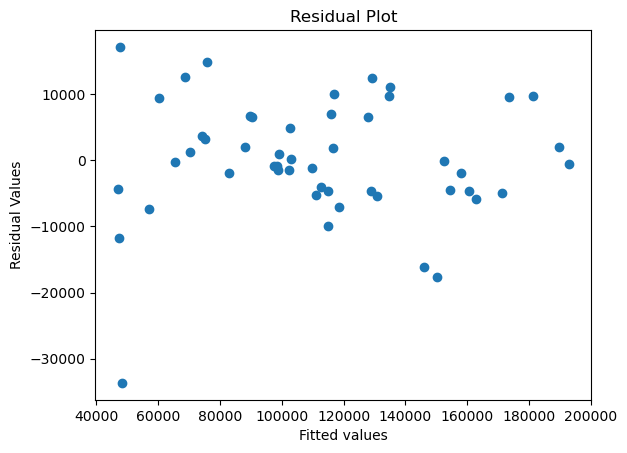

In [15]:
plt.scatter(model.fittedvalues,model.resid)
plt.title("Residual Plot")
plt.xlabel("Fitted values")
plt.ylabel("Residual Values")
plt.show()

In [16]:
#model deletion Diagnosis
#detecting outlayers
##cooks disatance

model_influence = model.get_influence()
model_influence
(cooks,pvalue) = model_influence.cooks_distance
cooks = pd.DataFrame(cooks)
cooks[0].describe()

count    50.000000
mean      0.023570
std       0.058261
min       0.000002
25%       0.000624
50%       0.004347
75%       0.023307
max       0.389489
Name: 0, dtype: float64

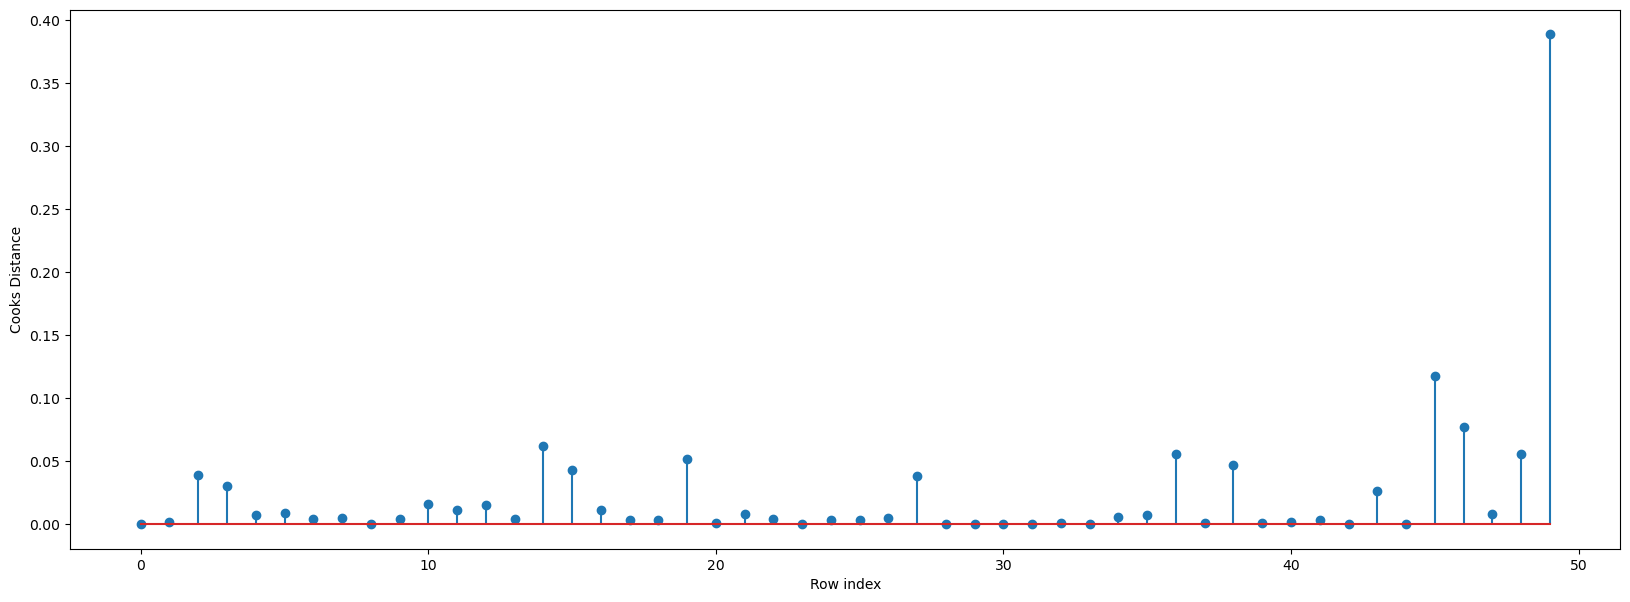

In [17]:
#plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(cooks[0], 3))
plt.xlabel("Row index")
plt.ylabel("Cooks Distance")
plt.show()

In [21]:
#i want to see the influencer points ., 0.20 is my choice
cooks[0][cooks[0] > 0.20]

49    0.389489
Name: 0, dtype: float64

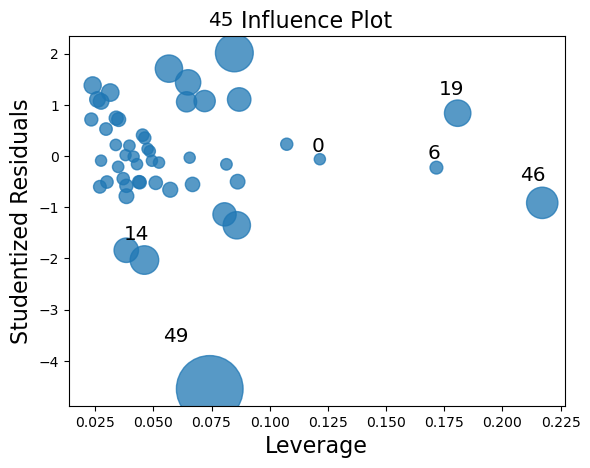

0.36

In [22]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()
k=df.shape[1]
n=df.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

In [23]:
#i want to see the influencer points .,using leverage_cutoff
cooks[0][cooks[0] > leverage_cutoff]

49    0.389489
Name: 0, dtype: float64

In [24]:
df.drop([49],inplace=True)
df.shape

(49, 5)

In [27]:
#---------------------------------------#---------------------------------------#---------------------------------------#
#------------------------------#---------Linear regression method -------------------------------------------------------#
#---------------------------------------#---------------------------------------#---------------------------------------#

In [29]:
#fitting the model with Linear regression method
#taking x varaibles as RD_Spend and Marketing_Spend having less relation
#taking y as profit
y = df["Profit"]
x= df[['RD_Spend','Marketing_Spend']]

In [30]:
from sklearn.linear_model import LinearRegression
LR =LinearRegression()
LR.fit(x,y)
y_pred=LR.predict(x)
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y,y_pred)
RMSE= np.sqrt(mse)
print("Root mean squared error: ", RMSE.round(2))
r2=r2_score(y,y_pred)
print(" r square:",r2.round(2))

Root mean squared error:  8881.89
 r square: 0.95


In [ ]:
# we are getting R2 as 95%. so our model is best fit with x varaibles as RD_Spend and Marketing_Spend